In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('city_data.csv')
df1.sort_values('city',inplace=True, ascending=True)
df1.head()

,city,driver_count,type
61,Amandaburgh,12,Urban
9,Barajasview,26,Urban
90,Barronchester,11,Suburban
88,Bethanyland,22,Suburban
115,Bradshawfurt,7,Rural


In [3]:
df2 = pd.read_csv('ride_data.csv')
df2.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
df=pd.merge(df1,df2,on='city')
df.head()

,city,driver_count,type,date,fare,ride_id
0,Amandaburgh,12,Urban,2018-03-05 02:15:38,26.28,906850928986
1,Amandaburgh,12,Urban,2018-02-24 23:10:49,43.66,6573820412437
2,Amandaburgh,12,Urban,2018-02-10 20:42:46,36.17,6455620849753
3,Amandaburgh,12,Urban,2018-01-11 02:22:07,29.24,7279902884763
4,Amandaburgh,12,Urban,2018-01-21 04:12:54,9.26,5528427024492


In [5]:
group=df.groupby('city')
result=pd.DataFrame({'Average Fare':group.mean()['fare'],                      
                     'Number of Rides':group.size()})
result.head()

,Average Fare,Number of Rides
city,,
Amandaburgh,24.641667,18
Barajasview,25.332273,22
Barronchester,36.422500,16
Bethanyland,32.956111,18
Bradshawfurt,40.064000,10


In [6]:
df3=df1.drop(columns="type")
df3 = df3.rename(columns={"driver_count": "Number of Drivers"})
result=pd.merge(result,df3,on='city')
result.head()

,city,Average Fare,Number of Rides,Number of Drivers
0,Amandaburgh,24.641667,18,12
1,Barajasview,25.332273,22,26
2,Barronchester,36.422500,16,11
3,Bethanyland,32.956111,18,22
4,Bradshawfurt,40.064000,10,7


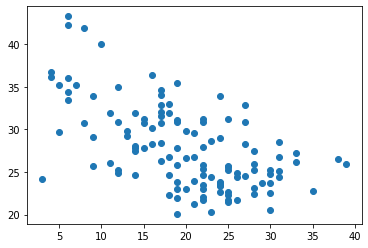

In [7]:
plt.scatter(result['Number of Rides'],result['Average Fare'])
plt.show()

In [8]:
df3=df.groupby('type')
df3.sum()

,driver_count,fare,ride_id
type,,,
Rural,537,4327.93,580968240341287
Suburban,8570,19356.33,3106884522576766
Urban,59602,39854.38,7919412664056093


([<matplotlib.patches.Wedge at 0x1f0676106d8>,
 [Text(1.0749106638891923, 0.23359594315247792, 'Rural'),
  Text(0.2031702810667748, 1.0810743900820368, 'Suburban'),
  Text(-0.42811329447141844, -1.0132714380149224, 'Urban')],
 [Text(0.5863149075759231, 0.12741596899226065, '6.8%'),
  Text(0.11082015330914988, 0.5896769400447472, '30.5%'),
  Text(-0.23351634243895547, -0.5526935116445031, '62.7%')])

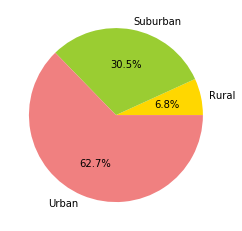

In [9]:
colors = ['gold', 'yellowgreen', 'lightcoral']
plt.pie(df3.sum()['fare'],colors=colors,labels=['Rural','Suburban','Urban'],autopct='%.1f%%')

In [19]:
df4=pd.merge(result,df1,on='city')
df4=df4.groupby('type')
df4.sum()

,Average Fare,Number of Rides,Number of Drivers,driver_count
type,,,,
Rural,623.479771,125,78,78
Suburban,1106.542729,625,490,490
Urban,1616.942033,1625,2405,2405


([<matplotlib.patches.Wedge at 0x1f067b019b0>,
 [Text(1.0849974335199486, 0.1810540506454493, 'Rural'),
  Text(0.4418649348526167, 1.0073506734735889, 'Suburban'),
  Text(-0.601642880908579, -0.9208831868657531, 'Urban')],
 [Text(0.5918167819199719, 0.09875675489751778, '5.3%'),
  Text(0.24101723719233634, 0.5494640037128666, '26.3%'),
  Text(-0.32816884413195213, -0.5022999201085925, '68.4%')])

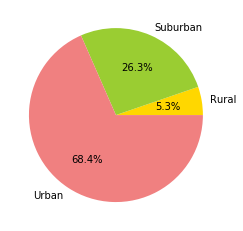

In [20]:
plt.pie(df4.sum()['Number of Rides'],colors=colors,labels=['Rural','Suburban','Urban'],autopct='%.1f%%')